# K Mean Clustering

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('file/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.Gender.replace({"Male":1,"Female":0},inplace=True)
df.head()

/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_2473/1764855696.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender.replace({"Male":1,"Female":0},inplace=True)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


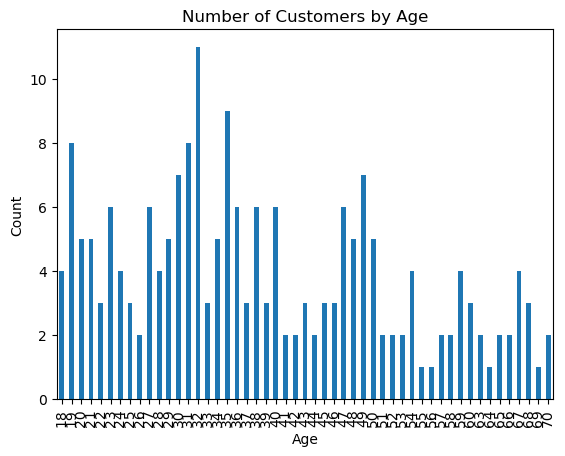

In [20]:
# To plot Age vs. Count (i.e., how many customers are at each age), use value_counts and plot as a bar chart:
df['Age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of Customers by Age')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1769fa450>,
 'caps': [<matplotlib.lines.Line2D at 0x1769fa6f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x173b043e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1769facc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1769fafc0>],
 'means': []}

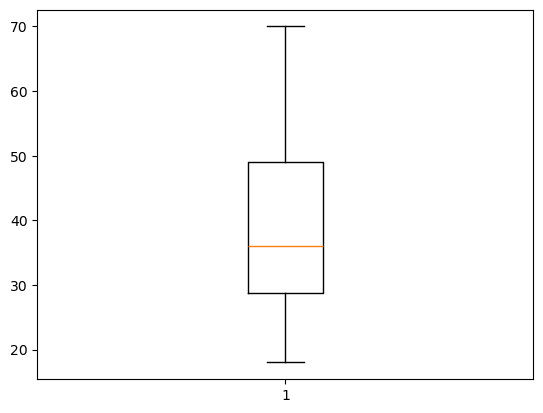

In [6]:
plt.boxplot(df.Age)

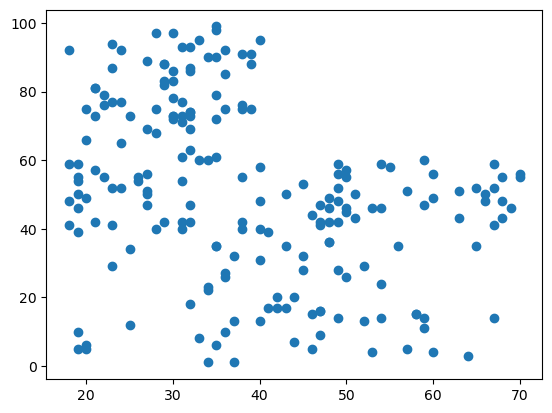

In [24]:
plt.scatter(df["Age"],df["Spending Score (1-100)"])

In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [29]:
df.rename(columns={"Spending Score (1-100)":"spending_score","Annual Income (k$)":"Annual_Income"},inplace=True)

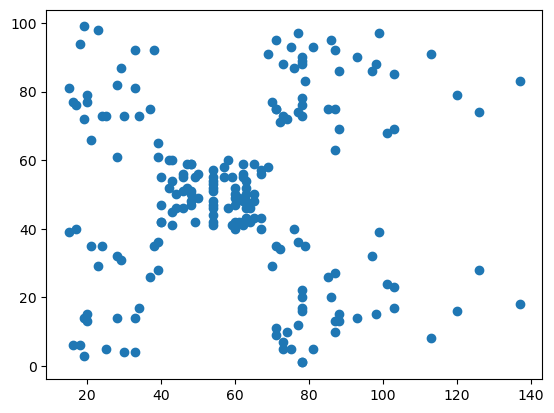

In [30]:
plt.scatter(x=df["Annual_Income"],y=df["spending_score"])